In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 5
nt = 5
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_sine'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

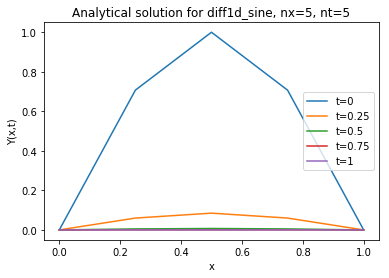

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s, nx=%d, nt=%d' % (eq_name, nx, nt));

## BFGS (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 224
         Function evaluations: 246
         Gradient evaluations: 246
9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 2.545879499569955e-13
 hess_inv: array([[ 10.96134843,   0.99032062,   2.14547685, ...,  -8.85422825,
          7.30336207,  10.19468546],
       [  0.99032062,   2.97770309,  -0.2369452 , ...,  -1.81724843,
          5.98529584,   3.03758621],
       [  2.14547685,  -0.2369452 ,   6.86917568, ..., -14.58963275,
         26.53310689,   9.46424716],
       ...,
       [ -8.85422825,  -1.81724843, -14.58963275, ...,  38.78250696,
        -70.71375637, -30.15599811],
       [  7.30336207,   5.98529584,  26.53310689, ..., -70.71375637,
        173.98704545,  60.02969192],
       [ 10.19468546,   3.03758621,   9.46424716, ..., -30.15599811,
         60.02969192,  29.8906668 ]])
      jac: array([-3.66133961e-09,  5.13123180e-06,  3.16104371e-06,  6

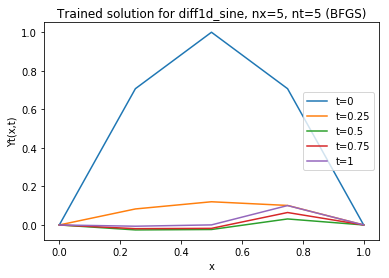

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

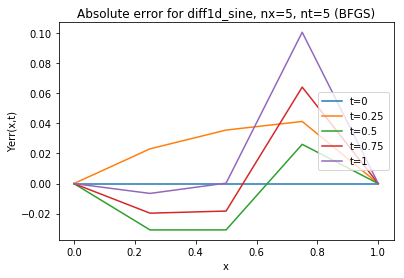

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s, nx=%d, nt=%d (%s)' % (eq_name, nx, nt, trainalg));

## BFGS (gtol=1e-6)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 225
         Function evaluations: 247
         Gradient evaluations: 247
9.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 2.4068464763919768e-14
 hess_inv: array([[ 10.98265637,   0.98195993,   2.36578502, ...,  -9.2794444 ,
          8.52451457,  10.51515787],
       [  0.98195993,   2.9727776 ,  -0.19389654, ...,  -1.8995767 ,
          6.2422966 ,   3.0969275 ],
       [  2.36578502,  -0.19389654,   7.10359689, ..., -15.0540784 ,
         27.54236737,   9.85700269],
       ...,
       [ -9.2794444 ,  -1.8995767 , -15.0540784 , ...,  39.70200359,
        -72.72988893, -30.931192  ],
       [  8.52451457,   6.2422966 ,  27.54236737, ..., -72.72988893,
        177.93200148,  61.79203182],
       [ 10.51515787,   3.0969275 ,   9.85700269, ..., -30.931192  ,
         61.79203182,  30.5359634 ]])
      jac: array([ 2.97169839e-09, -3.08616084e-07, -3.01834780e-07

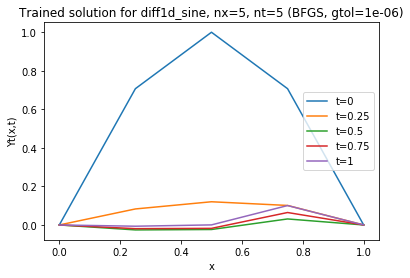

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

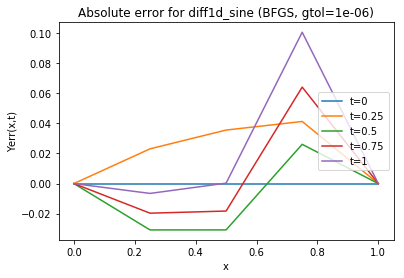

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-8)

In [12]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 229
         Function evaluations: 251
         Gradient evaluations: 251
9.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.481072492997056e-20
 hess_inv: array([[ 1.18433849e+01,  1.03160469e+00,  2.58651819e+00, ...,
        -9.90722598e+00,  8.92395203e+00,  1.13268973e+01],
       [ 1.03160469e+00,  3.04781076e+00, -1.64936544e-01, ...,
        -1.77790483e+00,  5.52331331e+00,  2.85191003e+00],
       [ 2.58651819e+00, -1.64936544e-01,  6.93011373e+00, ...,
        -1.46579427e+01,  2.62295976e+01,  9.59267631e+00],
       ...,
       [-9.90722598e+00, -1.77790483e+00, -1.46579427e+01, ...,
         3.92202935e+01, -7.13608102e+01, -3.10964344e+01],
       [ 8.92395203e+00,  5.52331331e+00,  2.62295976e+01, ...,
        -7.13608102e+01,  1.75376937e+02,  6.22020705e+01],
       [ 1.13268973e+01,  2.85191003e+00,  9.59267631e+00, ...,
        -3.10964344e+

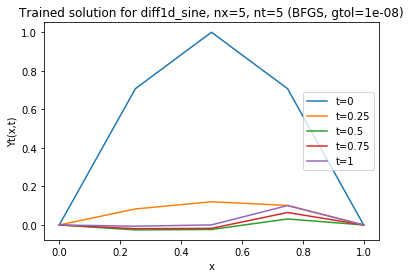

In [13]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

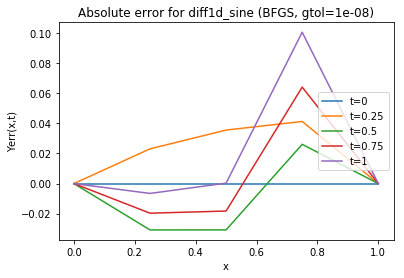

In [14]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (gtol=1e-10)

In [15]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-10
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 231
         Function evaluations: 253
         Gradient evaluations: 253
8.71 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 9.543587764629813e-24
 hess_inv: array([[ 1.16726403e+01,  1.08495640e+00,  2.47345586e+00, ...,
        -9.51018139e+00,  8.27482156e+00,  1.08938177e+01],
       [ 1.08495640e+00,  3.04823133e+00, -1.57522278e-01, ...,
        -1.84057412e+00,  5.54234044e+00,  2.92117452e+00],
       [ 2.47345586e+00, -1.57522277e-01,  6.90103738e+00, ...,
        -1.44968884e+01,  2.61045205e+01,  9.41641812e+00],
       ...,
       [-9.51018139e+00, -1.84057412e+00, -1.44968884e+01, ...,
         3.85301145e+01, -7.05477028e+01, -3.03474378e+01],
       [ 8.27482156e+00,  5.54234044e+00,  2.61045205e+01, ...,
        -7.05477028e+01,  1.74989602e+02,  6.13257636e+01],
       [ 1.08938177e+01,  2.92117452e+00,  9.41641812e+00, ...,
        -3.03474378e+

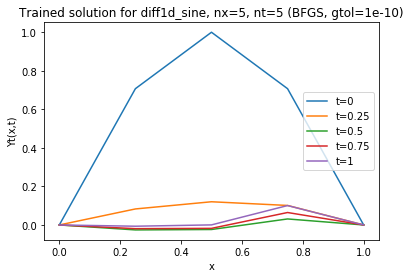

In [16]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s, nx=%d, nt=%d (%s, gtol=%g)' % (eq_name, nx, nt, trainalg, options['gtol']));

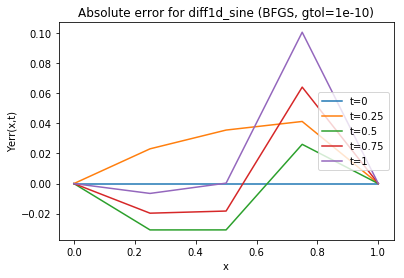

In [17]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, gtol=%g)' % (eq_name, trainalg, options['gtol']));